 #  Presentatino of the Portfolio Analysis using the DCF model assumptions that over/under value a stock performance
 

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import seaborn as sns
from pathlib import Path

%matplotlib inline

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [2]:
# Reading S&P 500 Closing Prices
spy_df = yf.download("SPY", start='2016-04-05', end="2021-04-05")

#Dropping extra columns and renaming close column to be able to combine data into a clean data frame for analysis
spy_df = spy_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'SP500'})

[*********************100%***********************]  1 of 1 completed


In [3]:
# Check Data Types
spy_df

,SP500
Date,
2016-04-05,204.190002
2016-04-06,206.419998
2016-04-07,203.949997
2016-04-08,204.500000
2016-04-11,204.020004
...,...
2021-03-26,395.980011
2021-03-29,395.779999
2021-03-30,394.730011


In [4]:
# Create daily return data from for SP500
spy_dr = spy_df.pct_change().dropna()
spy_dr

,SP500
Date,
2016-04-06,0.010921
2016-04-07,-0.011966
2016-04-08,0.002697
2016-04-11,-0.002347
2016-04-12,0.009313
...,...
2021-03-26,0.016115
2021-03-29,-0.000505
2021-03-30,-0.002653


---

# Create Custom Portfolio

## Choose a portfolio based on our DCF Over/Under model and see how the stocks perform vs. the market as well as create a balanced portfolio and review cumulative returns using historic and Monte Carlo Simulations

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

In [6]:
#Downloading stock infromatino from Yahoo Finance
amzn_df = yf.download("amzn", start='2016-04-05', end="2021-04-5")
fb_df = yf.download("fb", start='2016-04-05', end="2021-04-5")
alibaba_df = yf.download("baba", start='2016-04-05', end="2021-04-5")
netflix_df = yf.download("nflx", start='2016-04-05', end="2021-04-5")

#Dropping extra columns and renaming close column to be able to combine data into a clean data frame for analysis
amzn_df = amzn_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'AMZN'})
fb_df = fb_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'FB'})
alibaba_df = alibaba_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'BABA'})
netflix_df = netflix_df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume']).rename(columns = {'Close':'NFLX'})


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
# Combine all stocks in a single DataFrame
stock_df = pd.concat([amzn_df, fb_df, alibaba_df, netflix_df, spy_df], axis="columns", join="inner")
stock_df.sort_index(inplace=True)
stock_df

,AMZN,FB,BABA,NFLX,SP500
Date,,,,,
2016-04-05,586.140015,112.220001,77.320000,104.940002,204.190002
2016-04-06,602.080017,113.709999,78.680000,104.830002,206.419998
2016-04-07,591.429993,113.639999,77.610001,104.449997,203.949997
2016-04-08,594.599976,110.629997,77.470001,103.809998,204.500000
2016-04-11,595.929993,108.989998,77.709999,102.680000,204.020004
...,...,...,...,...,...
2021-03-26,3052.030029,283.019989,227.259995,508.049988,395.980011
2021-03-29,3075.729980,290.820007,231.860001,513.950012,395.779999
2021-03-30,3055.290039,288.000000,229.250000,513.390015,394.730011


<AxesSubplot:xlabel='Date'>

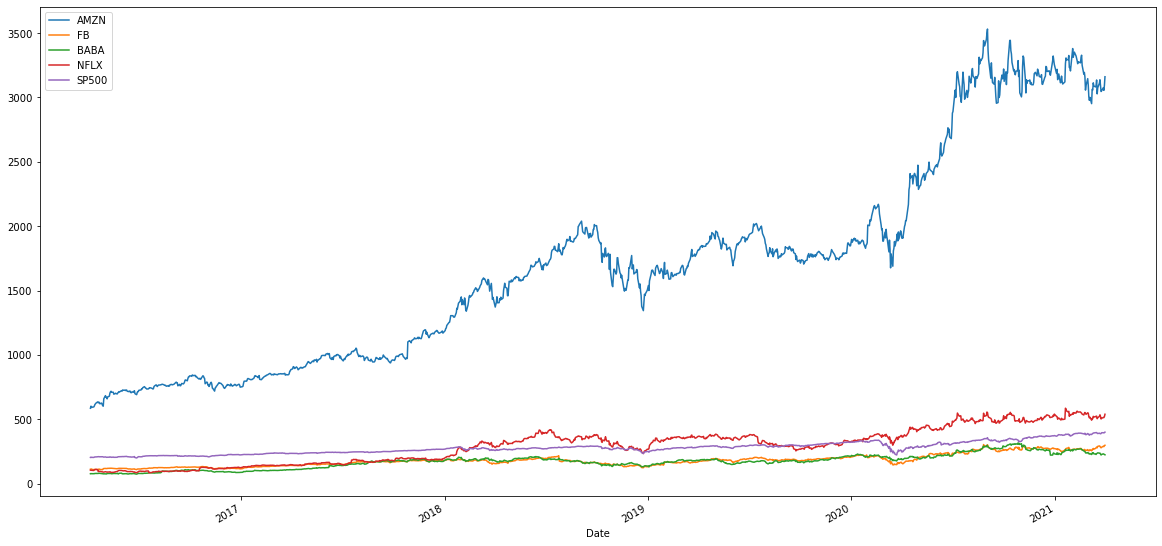

In [9]:
# Reset Date index
stock_df.plot(figsize=(20,10))

In [10]:
# Calculate daily returns and drop NA's
stock_dr = stock_df.pct_change().dropna()

# Display sample data
stock_dr.head()

,AMZN,FB,BABA,NFLX,SP500
Date,,,,,
2016-04-06,0.027195,0.013277,0.017589,-0.001048,0.010921
2016-04-07,-0.017689,-0.000616,-0.013599,-0.003625,-0.011966
2016-04-08,0.005360,-0.026487,-0.001804,-0.006127,0.002697
2016-04-11,0.002237,-0.014824,0.003098,-0.010885,-0.002347
2016-04-12,0.012149,0.014864,0.001930,0.041878,0.009313


In [11]:
# Calculate the annualized `std`
stock_std = stock_dr.std()
stock_std

stock_an_std = stock_std * np.sqrt(252)
stock_an_std

AMZN     0.294502
FB       0.323105
BABA     0.335436
NFLX     0.404000
SP500    0.188320
dtype: float64

In [12]:
# Calculate the correlation
stock_cor = stock_dr.corr()

# Display de correlation matrix
stock_cor

,AMZN,FB,BABA,NFLX,SP500
AMZN,1.000000,0.619806,0.523711,0.591877,0.608760
FB,0.619806,1.000000,0.477355,0.467395,0.631051
BABA,0.523711,0.477355,1.000000,0.413030,0.500964
NFLX,0.591877,0.467395,0.413030,1.000000,0.473537
SP500,0.608760,0.631051,0.500964,0.473537,1.000000


<AxesSubplot:>

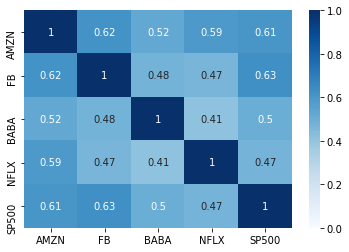

In [13]:
# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(stock_cor, vmin=0, vmax=1, annot=True, cmap='Blues')

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [17]:
# Combine all stocks in a single DataFrame to create a portfolio to measure against the SP500
portfolio_df = pd.concat([amzn_df, fb_df, alibaba_df, netflix_df], axis="columns", join="inner")
portfolio_df.sort_index(inplace=True)
portfolio_df

# Calculate daily returns and drop NA's
portfolio_dr = portfolio_df.pct_change().dropna()

# Display sample data
portfolio_dr.head()

# Set weights
weights = [.25, .25, .25, .25]

# Calculate portfolio return
portfolio_returns = portfolio_dr.dot(weights)

# Display sample data
portfolio_returns_df = pd.DataFrame(portfolio_returns).rename(columns = {0:'DCF_PORT'})
portfolio_returns_df.sort_index(inplace=True)
portfolio_returns_df

,DCF_PORT
Date,
2016-04-06,0.014253
2016-04-07,-0.008882
2016-04-08,-0.007265
2016-04-11,-0.005094
2016-04-12,0.017705
...,...
2021-03-26,0.011989
2021-03-29,0.016795
2021-03-30,-0.007172


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [18]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_comb_df = pd.concat([portfolio_returns_df, spy_dr], axis="columns", join="inner").dropna()
portfolio_comb_df.head()

,DCF_PORT,SP500
Date,,
2016-04-06,0.014253,0.010921
2016-04-07,-0.008882,-0.011966
2016-04-08,-0.007265,0.002697
2016-04-11,-0.005094,-0.002347
2016-04-12,0.017705,0.009313


<AxesSubplot:xlabel='Date'>

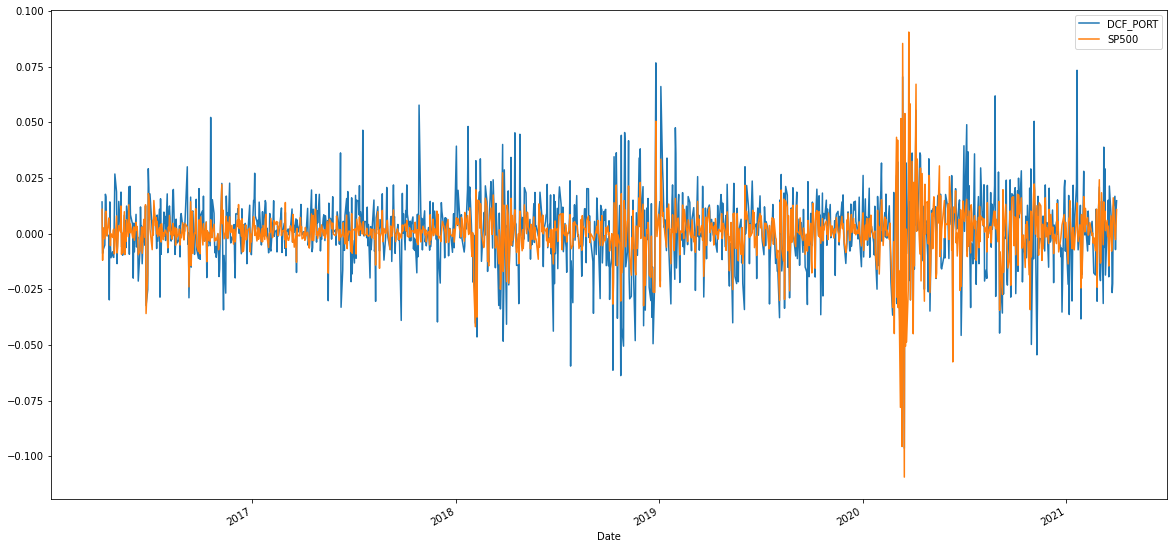

In [19]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_comb_df.plot(figsize = (20,10))

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
combined_port_std = portfolio_comb_df.std()
combined_port_std.head()

combined_port_an_std = combined_port_std * np.sqrt(252)
combined_port_an_std.head()

DCF_PORT    0.273223
SP500       0.188320
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation for each Portfolio'}, xlabel='Date'>

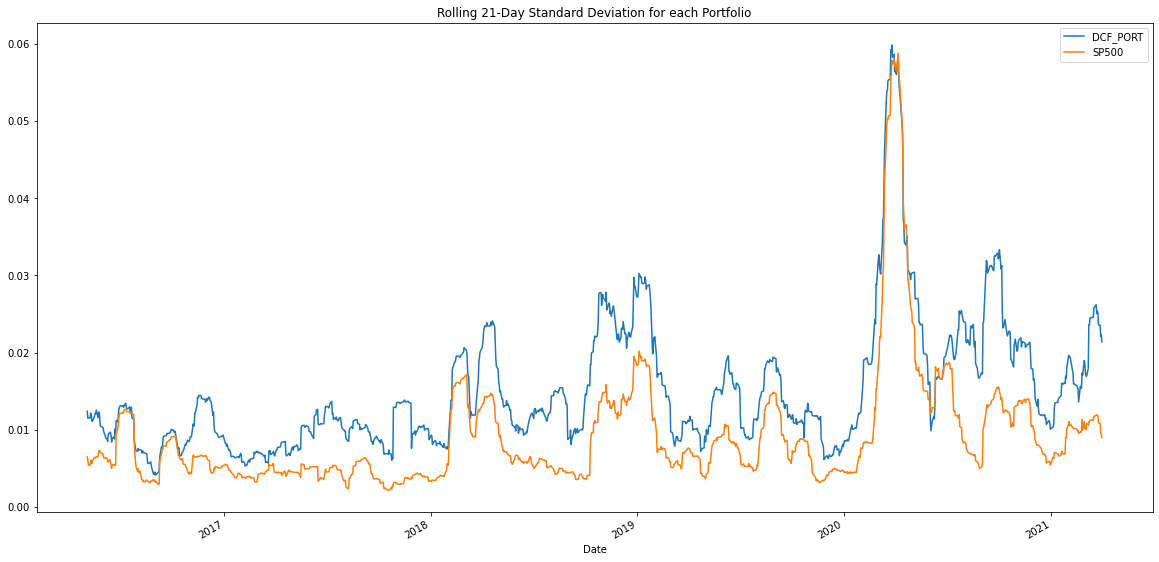

In [50]:
# Calculate rolling standard deviation
combined_std21 = portfolio_comb_df.rolling(window=21).std().dropna()

# Plot the rolling standard deviation
combined_std21.plot(figsize=(20,10), title='Rolling 21-Day Standard Deviation for each Portfolio')

### Calculate and plot the correlation

In [51]:
# Calculate the correlation
combined_cor = portfolio_comb_df.corr()

# Display de correlation matrix
combined_cor

,DCF_PORT,SP500
DCF_PORT,1.000000,0.795147
SP500,0.795147,1.000000


<AxesSubplot:>

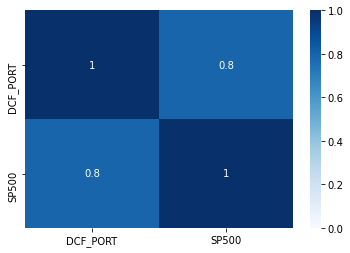

In [53]:
sns.heatmap(combined_cor, vmin=0, vmax=1, annot=True, cmap='Blues')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [55]:
# Calculate covariance of a the custum portfolio
covariance_port = portfolio_comb_df['DCF_PORT'].cov(portfolio_comb_df['SP500'])

# Calculate variance of S&P 500
variance_sp500 = portfolio_comb_df['SP500'].var()

# Computing beta
combined_beta = covariance_port / variance_sp500
combined_beta

1.1536345188039876

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portolio'}, xlabel='Date'>

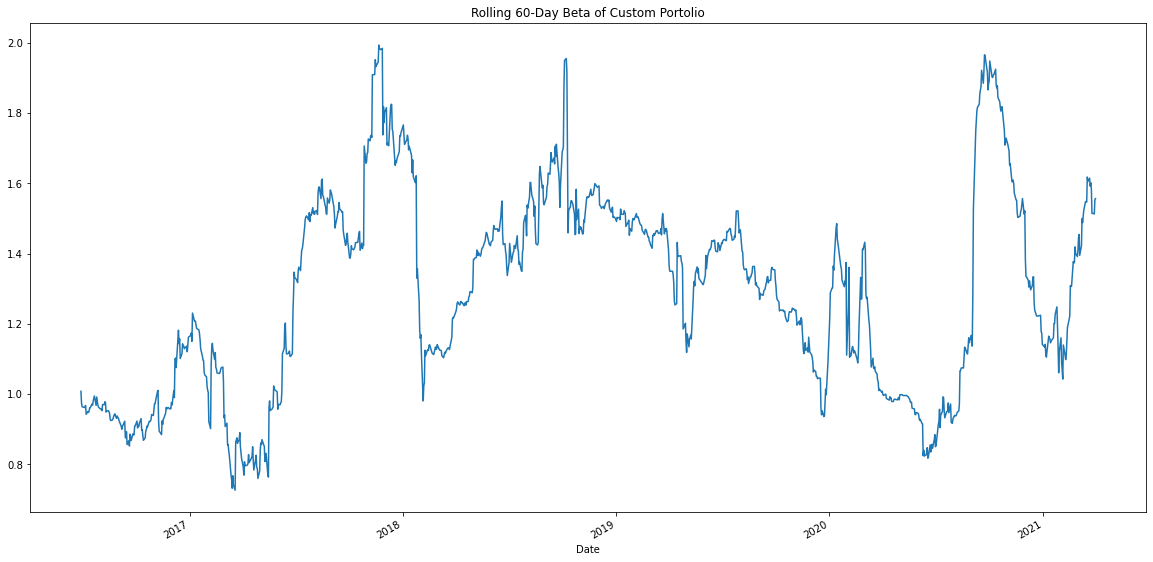

In [56]:
# Plot beta trend
combined_rolling_covariance = portfolio_comb_df['DCF_PORT'].rolling(window=60).cov(portfolio_comb_df['SP500'])
sp500_rolling_variance = portfolio_comb_df['SP500'].rolling(window=60).var()
combined_rolling_beta = combined_rolling_covariance / sp500_rolling_variance
combined_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Custom Portolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [57]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (portfolio_comb_df.mean() * 252) / (portfolio_comb_df.std() * np.sqrt(252))
sharpe_ratios

DCF_PORT    1.464893
SP500       0.812400
dtype: float64

<AxesSubplot:>

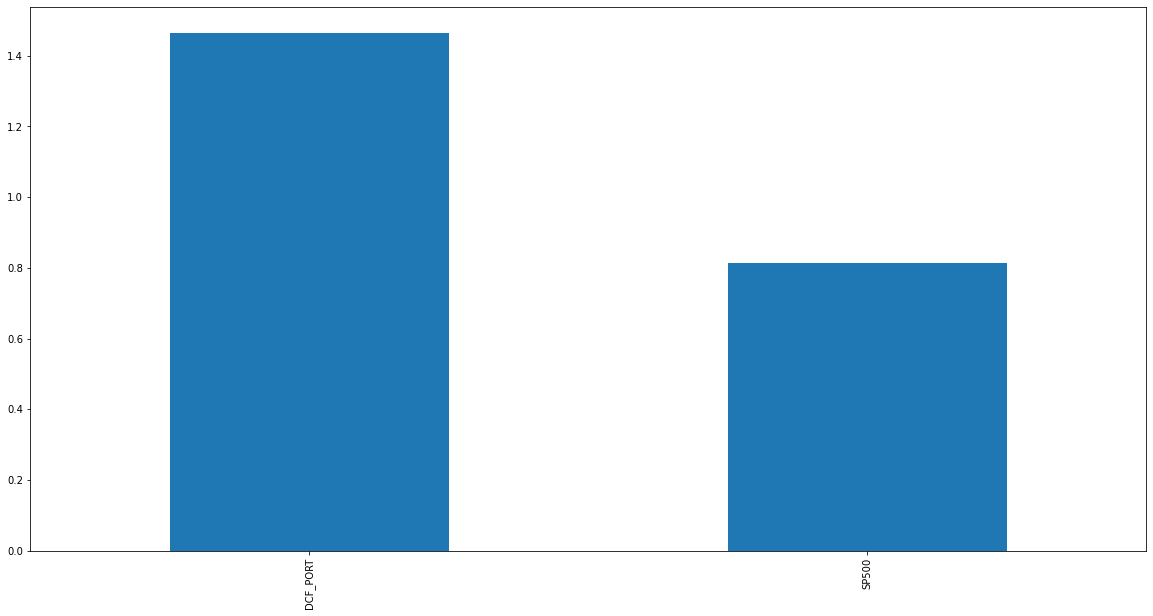

In [58]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize = (20,10))

### How does your portfolio do?

Don't they always say investing in tech stock should prove stong.  The risk to my portfolio while showing by far the strongest returns is exposed given if the tech industry is overvalued it could tumble quickly as I am not diversified well currently.  I could have created less risk by looking more at a 60/40 split with a more stable bond/commodity market to help cover downside risk.  That said my portfolio did perform well for the purpose of this excersize.  This is clearly seen in the beta and plot of the rollling beta with stocks carrying a beta > 1 to have greater price swings and that would be expected with my portfolio.  Additionally, I was a bit surprised by the sharp ratio and final results, I would have expected Algo 1 to perform a bit closer to the tech portfolio I had chosen to invest in, but this could be explained by the lack of correlation to Algo 1 and I would have to dig deeper into the structer of the holdings to get a better sense of this information.  In conclusion, my portfolio performed exceedingly well, but again I could see bigger swings in the future and that could wipe out the results below rather quickly.

<AxesSubplot:title={'center':'Performance of $10,000 invested in each Portfolio'}, xlabel='Date'>

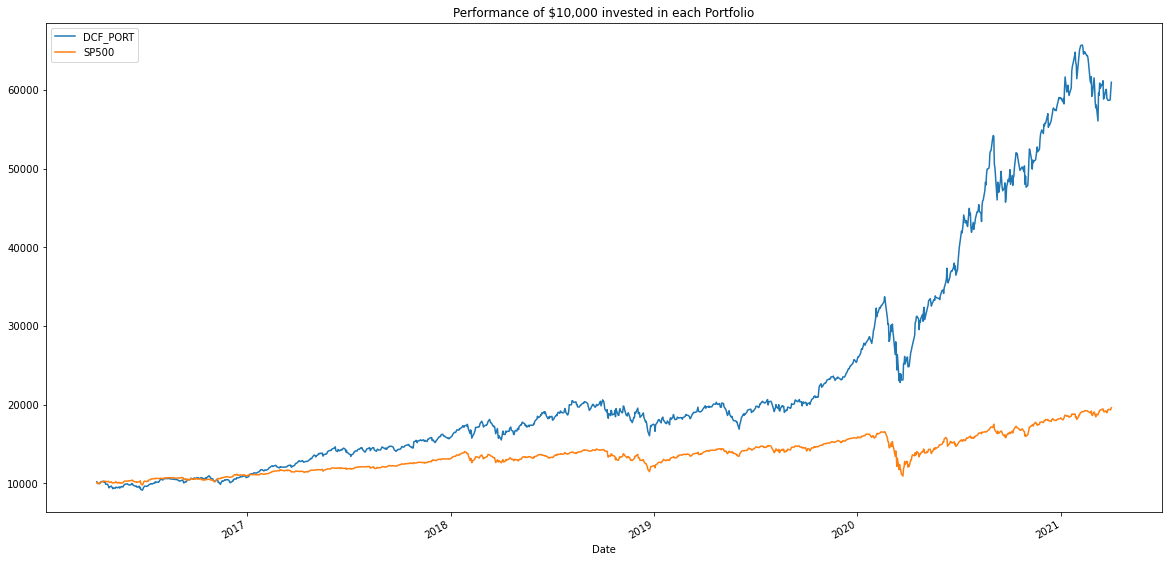

In [59]:
#Supporting result of $10,000 investment in each portfolio to measure and visualize cumulative returns.
initial_investment = 10000
candidate_cumulative_returns = (1 + portfolio_comb_df).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10), title='Performance of $10,000 invested in each Portfolio')